# K-MEANS CLUSTERING - Insurance Data

Lets load necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [3]:
data = pd.read_csv('Insurance Dataset.csv')
data.head()

,Premiums Paid,Age,Days to Renew,Claims made,Income
0,2800,26,233,3890.076336,28000
1,2950,27,130,2294.444444,29500
2,3100,28,144,2564.545455,31000
3,3250,30,65,1978.260870,32500
4,3400,32,56,2009.090909,34000


Lets analyse our data

In [4]:
df = data.copy()

In [6]:
df.shape

(100, 5)

In [7]:
df.describe()

,Premiums Paid,Age,Days to Renew,Claims made,Income
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,12542.250000,46.110000,120.400000,12578.993367,102250.000000
std,6790.731666,13.887641,88.055767,13695.906762,43517.237964
min,2800.000000,23.000000,1.000000,1978.260870,28000.000000
25%,6975.000000,34.000000,56.000000,5220.648735,65125.000000
50%,11825.000000,45.000000,89.000000,8386.043907,102250.000000
75%,15475.000000,54.500000,186.500000,14670.889520,139375.000000
max,29900.000000,82.000000,321.000000,99676.744190,176500.000000


In [8]:
df.columns

Index(['Premiums Paid', 'Age', 'Days to Renew', 'Claims made', 'Income'], dtype='object')

<AxesSubplot:>

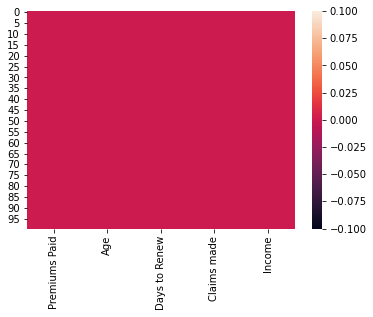

In [9]:
sns.heatmap(df.isnull())

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Premiums Paid  100 non-null    int64  
 1   Age            100 non-null    int64  
 2   Days to Renew  100 non-null    int64  
 3   Claims made    100 non-null    float64
 4   Income         100 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 4.0 KB


In [12]:
df.duplicated().sum()

0

<AxesSubplot:>

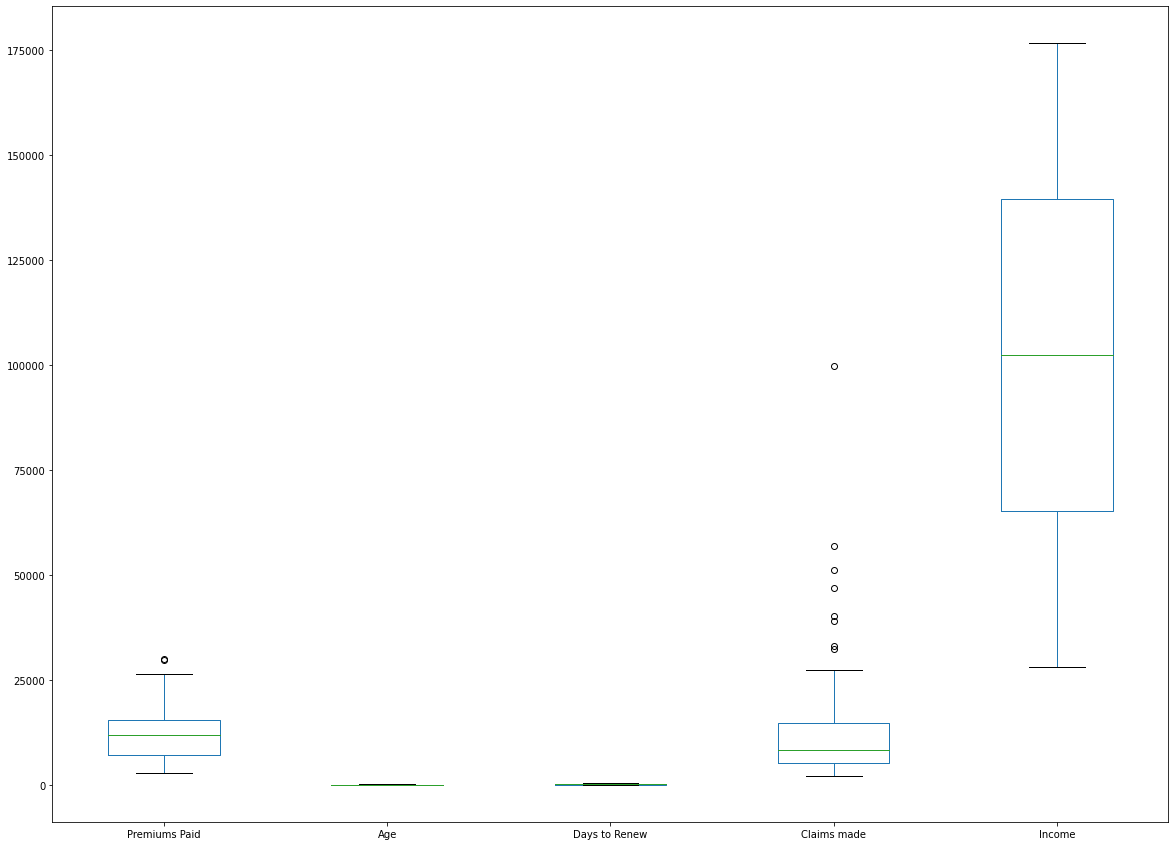

In [14]:
plt.rcParams['figure.figsize'] = (20,15)
df.plot(kind='box')

C:\Users\jaich\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Premiums Paid', ylabel='Claims made'>

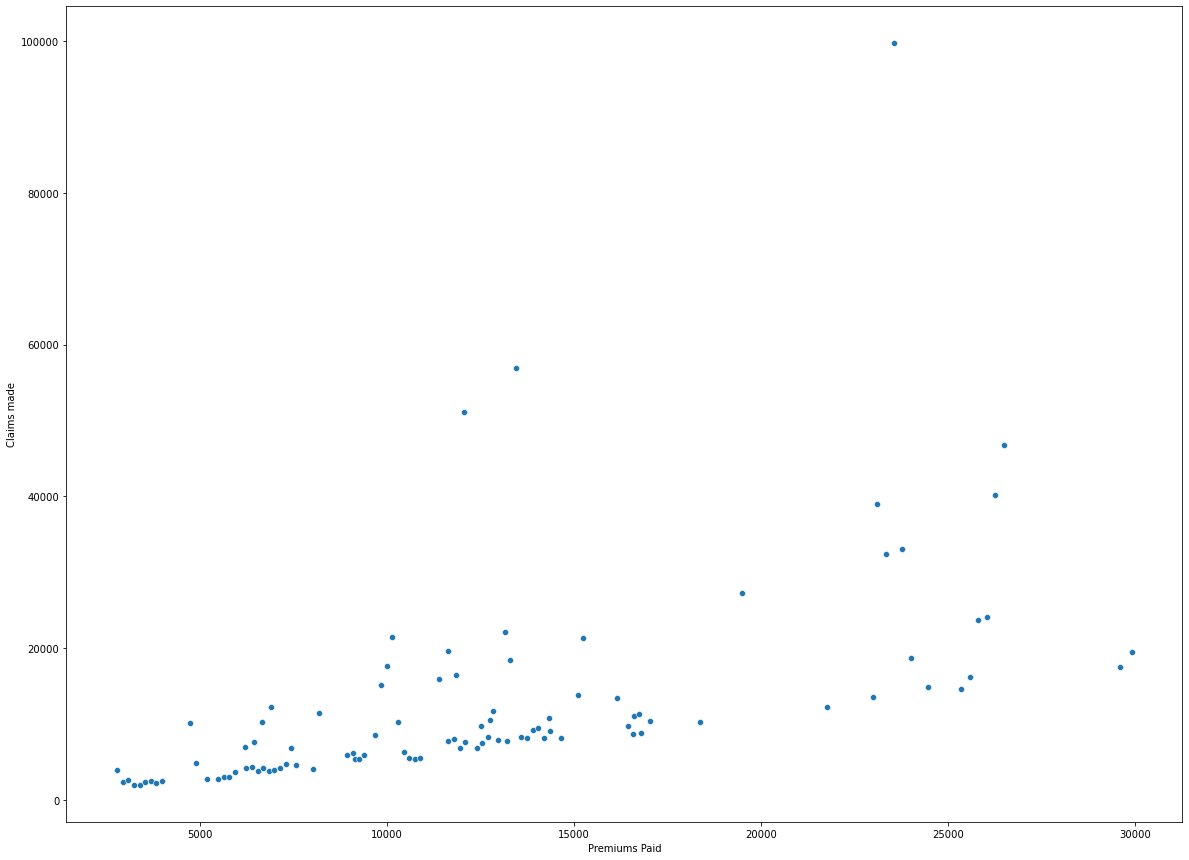

In [15]:
sns.scatterplot('Premiums Paid', 'Claims made', data=df)

C:\Users\jaich\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Premiums Paid', ylabel='Income'>

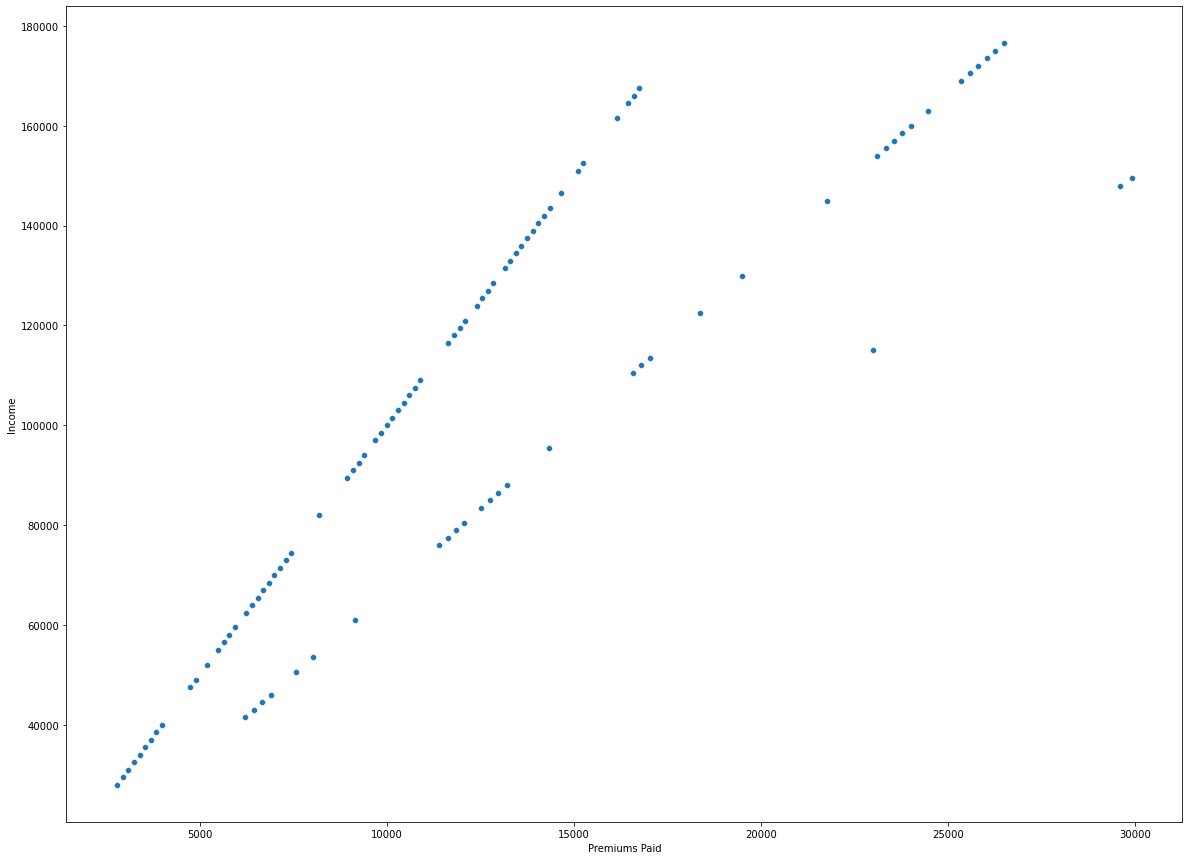

In [16]:
sns.scatterplot('Premiums Paid', 'Income', data=df)

C:\Users\jaich\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Claims made', ylabel='Income'>

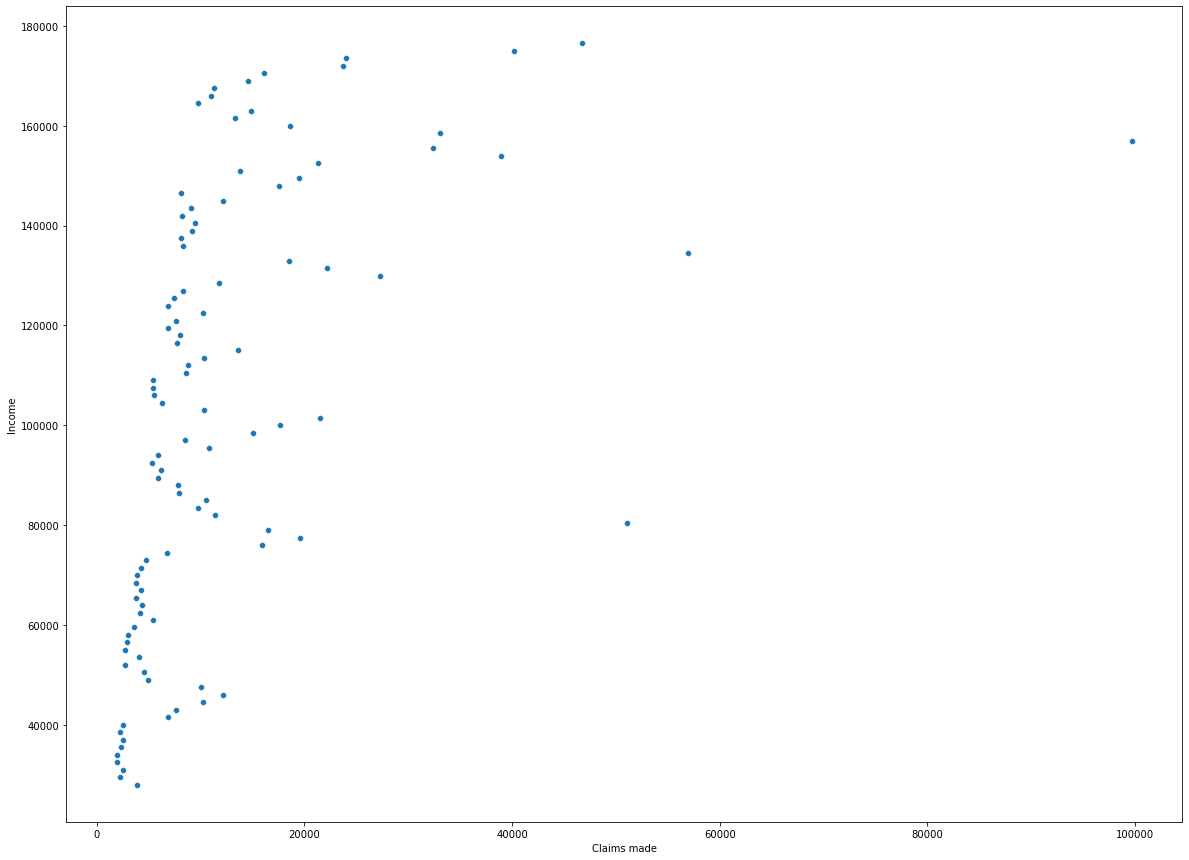

In [17]:
sns.scatterplot('Claims made', 'Income', data=df)

<AxesSubplot:>

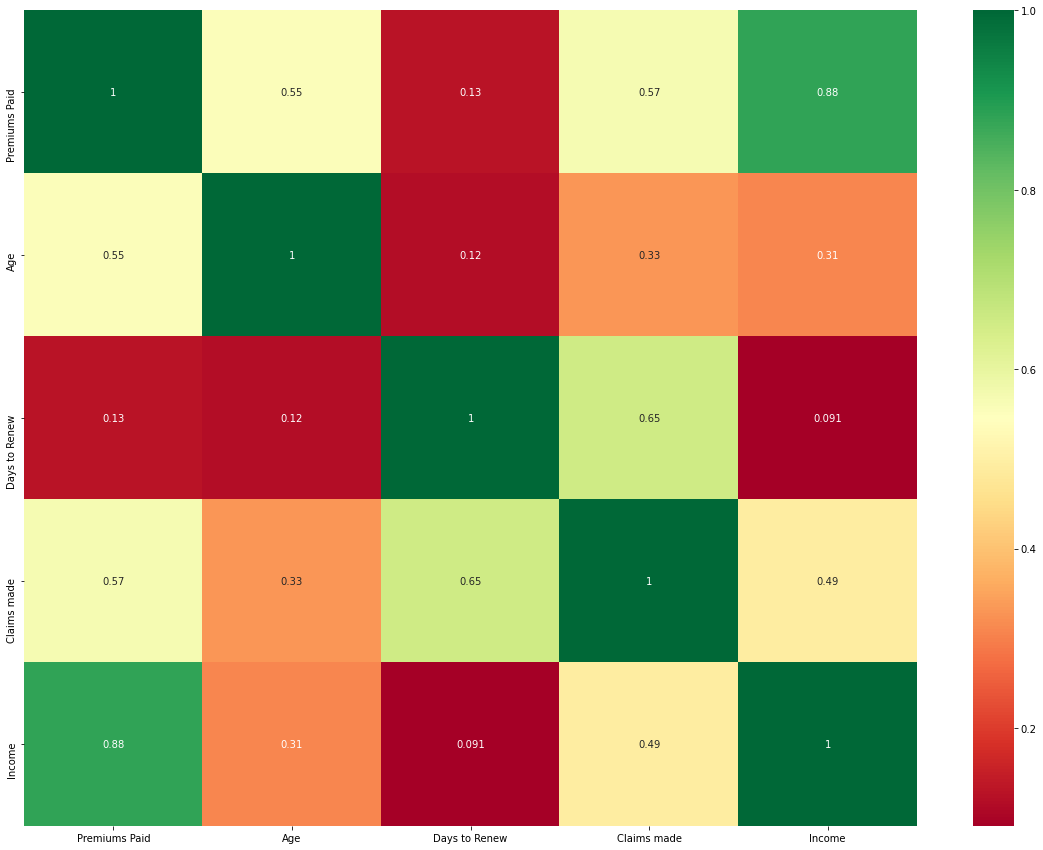

In [20]:
sns.heatmap(df.corr(), annot = True, cmap='RdYlGn')

45    0.08
44    0.07
34    0.06
32    0.05
56    0.05
48    0.04
49    0.04
42    0.04
26    0.03
70    0.03
69    0.03
67    0.03
53    0.03
50    0.03
23    0.03
46    0.03
41    0.03
35    0.03
30    0.03
28    0.03
27    0.03
52    0.02
36    0.02
54    0.02
58    0.02
59    0.02
62    0.02
63    0.02
82    0.02
39    0.01
77    0.01
Name: Age, dtype: float64


<AxesSubplot:>

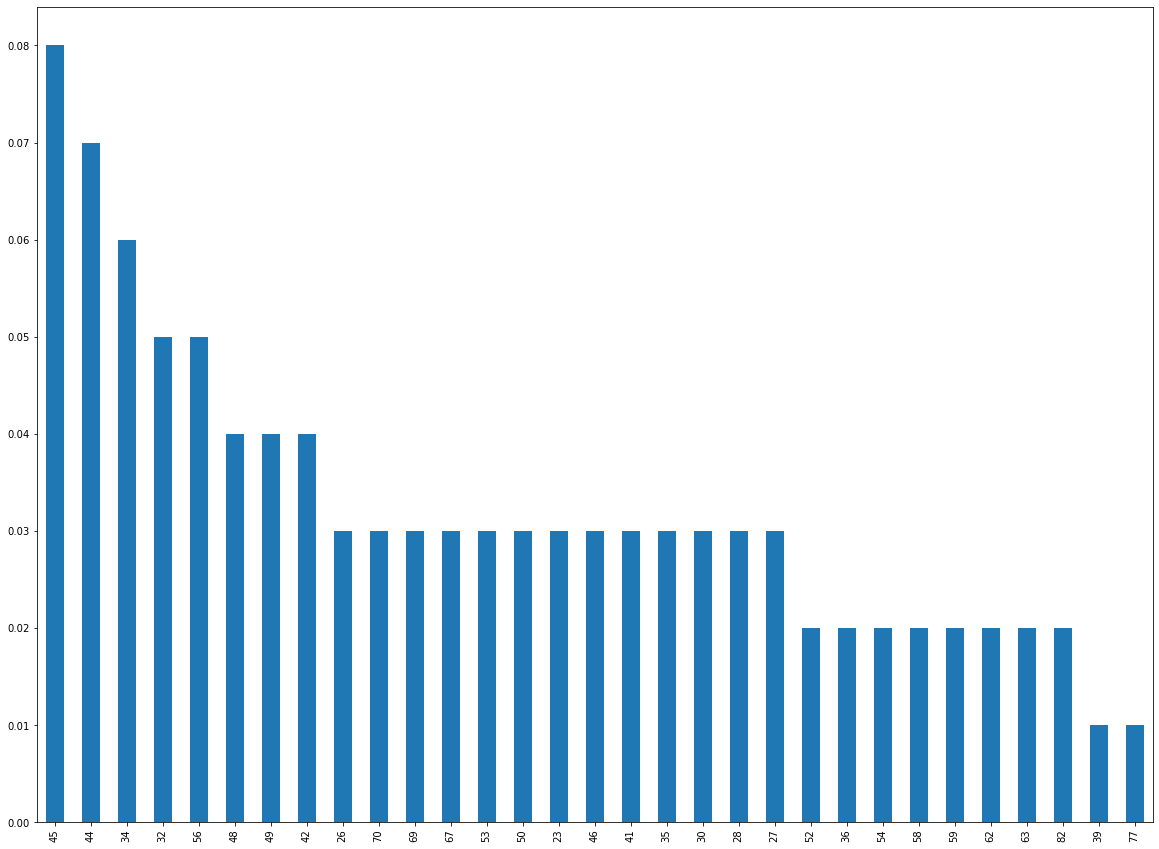

In [19]:
print(df['Age'].value_counts()/df.shape[0])
(df['Age'].value_counts()/df.shape[0]).plot(kind='bar') # To see break up of data by Age

We could see there were some outliers in our data, lets check how many outliers are there in each column

In [21]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3 - Q1

outliers = (df < (Q1-1.5*IQR)) | (df > (Q3 + 1.5 * IQR))
outliers.sum()

Premiums Paid    2
Age              0
Days to Renew    0
Claims made      8
Income           0
dtype: int64

Lets Normalize our data and apply Kmeans Clustering on it

In [23]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return(x)

norm = df.copy()
df_norm = norm_func(norm)
df_norm.head()

,Premiums Paid,Age,Days to Renew,Claims made,Income
0,0.000000,0.050847,0.725000,0.019569,0.000000
1,0.005535,0.067797,0.403125,0.003236,0.010101
2,0.011070,0.084746,0.446875,0.006001,0.020202
3,0.016605,0.118644,0.200000,0.000000,0.030303
4,0.022140,0.152542,0.171875,0.000316,0.040404


<AxesSubplot:ylabel='Density'>

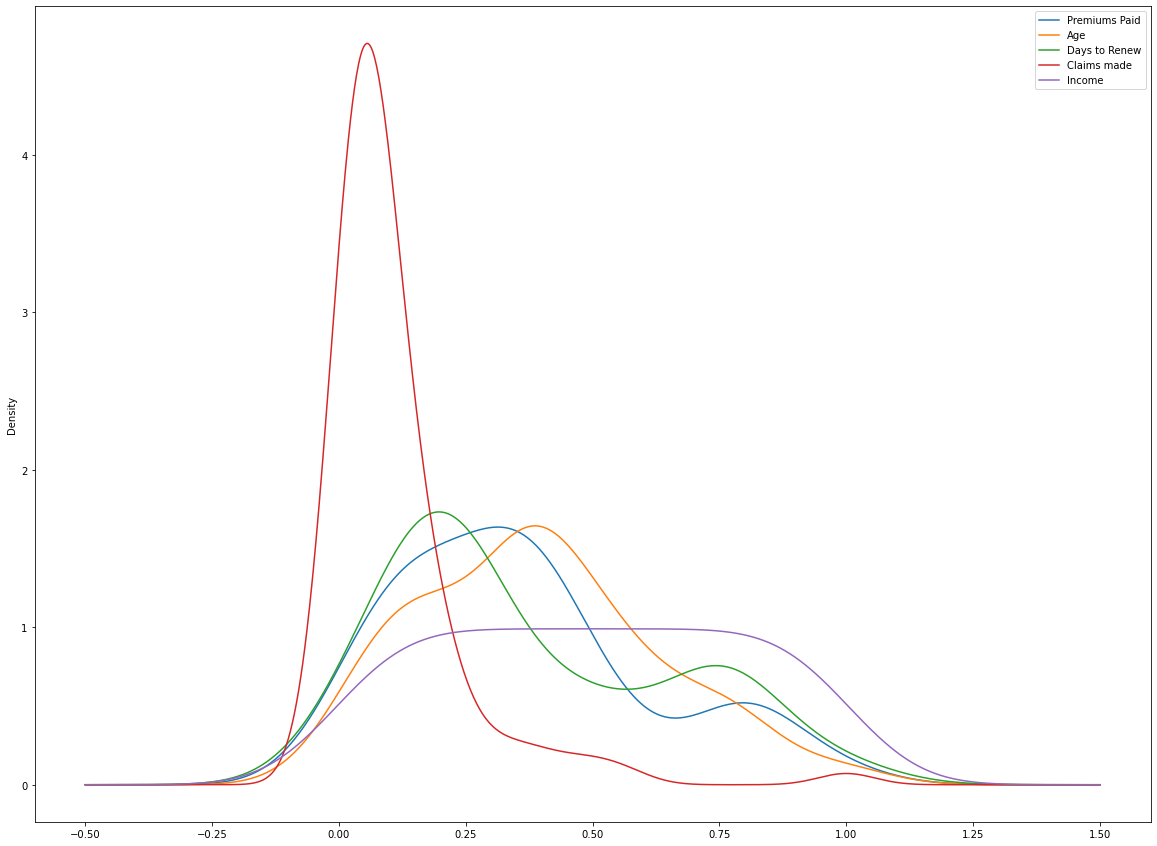

In [25]:
df_norm.plot(kind='kde')

Lets Create an Elbow or Skree Plot

Text(0, 0.5, 'total_within_SS')

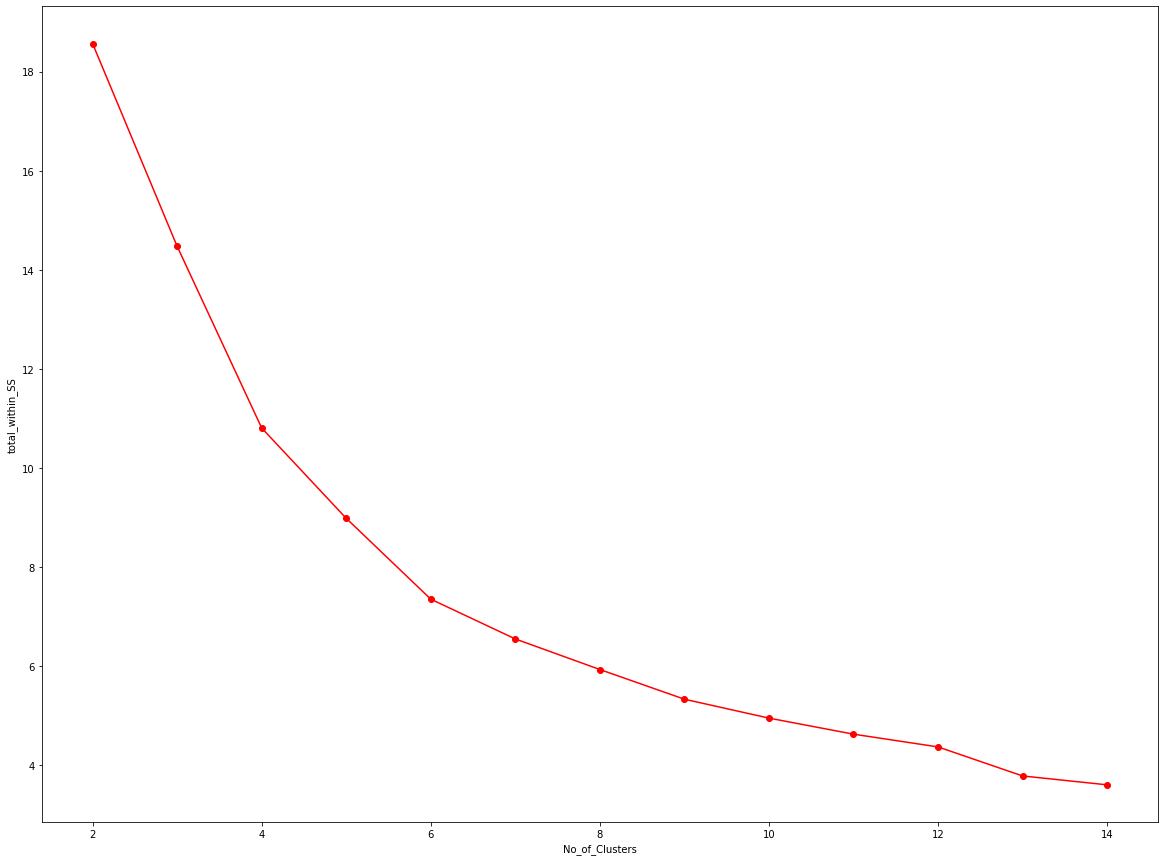

In [26]:
TWSS = []
k=list(range(2,15))

for i in k:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_norm)
    TWSS.append(kmeans.inertia_)
    
plt.plot(k,TWSS, 'ro-');plt.xlabel('No_of_Clusters');plt.ylabel('total_within_SS')

In [27]:
from kneed import KneeLocator

In [28]:
kl = KneeLocator(range(2,15), TWSS, curve='convex', direction='decreasing')
kl.elbow

6

Based on Elbow Curve and Knee Locator, ncluster = 6 should be good

In [29]:
model = KMeans(n_clusters=6)
model.fit(df_norm)
model.labels_
md = pd.Series(model.labels_)
df['Clust'] = md
df.head()

,Premiums Paid,Age,Days to Renew,Claims made,Income,Clust
0,2800,26,233,3890.076336,28000,4
1,2950,27,130,2294.444444,29500,4
2,3100,28,144,2564.545455,31000,4
3,3250,30,65,1978.260870,32500,4
4,3400,32,56,2009.090909,34000,4


In [31]:
cluster = df.iloc[:,:-1].groupby(df.Clust).mean()
cluster

,Premiums Paid,Age,Days to Renew,Claims made,Income
Clust,,,,,
0,12972.794118,42.588235,74.294118,8378.419301,119852.941176
1,23095.454545,66.000000,66.090909,14299.615910,146500.000000
2,23305.000000,57.900000,235.000000,38737.784251,160450.000000
3,9150.000000,65.500000,245.125000,17512.951670,61000.000000
4,5555.555556,37.814815,75.296296,3564.550425,52500.000000
5,10285.000000,31.300000,244.300000,19201.298811,102850.000000


In [32]:
cluster.to_csv('KMEANS_Insurance_6Clusters.csv', encoding='utf-8')

Building model with 5 clusters

In [33]:
model = KMeans(n_clusters=5)
model.fit(df_norm)
model.labels_
md = pd.Series(model.labels_)
df['Clust'] = md
df.head()

,Premiums Paid,Age,Days to Renew,Claims made,Income,Clust
0,2800,26,233,3890.076336,28000,3
1,2950,27,130,2294.444444,29500,4
2,3100,28,144,2564.545455,31000,4
3,3250,30,65,1978.260870,32500,4
4,3400,32,56,2009.090909,34000,4


In [34]:
cluster = df.iloc[:,:-1].groupby(df.Clust).mean()
cluster

,Premiums Paid,Age,Days to Renew,Claims made,Income
Clust,,,,,
0,22409.090909,55.909091,242.818182,40391.431772,158090.909091
1,12879.285714,42.114286,76.628571,8381.535892,119200.000000
2,23095.454545,66.000000,66.090909,14299.615910,146500.000000
3,8844.736842,46.894737,237.210526,14858.149403,75605.263158
4,5618.750000,37.708333,60.541667,3359.967387,52750.000000


In [35]:
cluster.to_csv('KMEANS_Insurance_5Clusters.csv', encoding='utf-8')

From the above we can see that 5 clusters are better then 6